In [26]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [27]:
all_df = pd.read_csv("data/weather.csv")

In [28]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [29]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [30]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [31]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

95672

In [32]:
test_Features[:2]

array([[-0.28057235, -0.88540995, -0.15604664,  0.58549966,  0.29969181,
         0.56686938,  0.71671696,  0.24811193, -0.16280797,  0.27738035,
        -0.47846775, -0.9189042 , -0.53271769],
       [ 0.74023477, -0.34150784, -0.274179  ,  0.43712836,  1.89126836,
         1.3737581 , -0.06742478,  1.02136889, -0.43047181, -0.40644069,
         0.40533611, -0.21640785, -0.53271769]])

In [33]:
train_Label[:4]

array([1, 1, 0, 1])

In [34]:
train_Features.shape

(95672, 13)

In [35]:
test_Label[:4]

array([1, 0, 0, 0])

In [36]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [37]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [ ]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [38]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [39]:
model = Sequential()

In [40]:
model.add(SimpleRNN(units=26, input_shape=(13,1)))

In [41]:
model.add(Dense(2, activation = "sigmoid"))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 26)                728       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 27        
Total params: 755
Trainable params: 755
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [44]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 76537 samples, validate on 19135 samples
Epoch 1/60
76537/76537 [==============================] - 5s 67us/step - loss: 0.6027 - acc: 0.6406 - val_loss: 0.4235 - val_acc: 0.8160
Epoch 2/60
76537/76537 [==============================] - 3s 41us/step - loss: 0.3944 - acc: 0.8314 - val_loss: 0.3786 - val_acc: 0.8386
Epoch 3/60
76537/76537 [==============================] - 3s 44us/step - loss: 0.3704 - acc: 0.8431 - val_loss: 0.3677 - val_acc: 0.8438
Epoch 4/60
76537/76537 [==============================] - 3s 43us/step - loss: 0.3626 - acc: 0.8474 - val_loss: 0.3630 - val_acc: 0.8444
Epoch 5/60
76537/76537 [==============================] - 3s 45us/step - loss: 0.3586 - acc: 0.8487 - val_loss: 0.3594 - val_acc: 0.8460
Epoch 6/60
76537/76537 [==============================] - 3s 45us/step - loss: 0.3557 - acc: 0.8502 - val_loss: 0.3575 - val_acc: 0.8480
Epoch 7/60
76537/76537 [==============================] - 3s 45us/step - loss: 0.3543 - acc: 0.8505 - val_loss: 0.3570 - val_acc

In [45]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

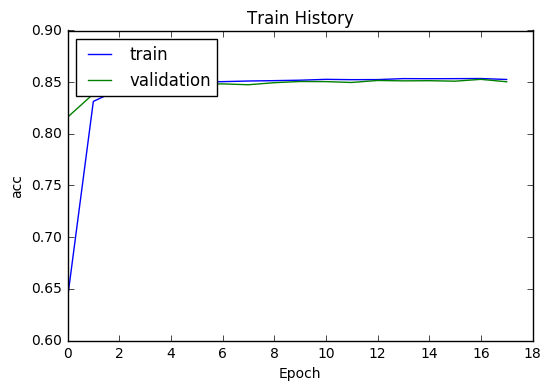

In [46]:
show_train_history(train_history,'acc','val_acc')

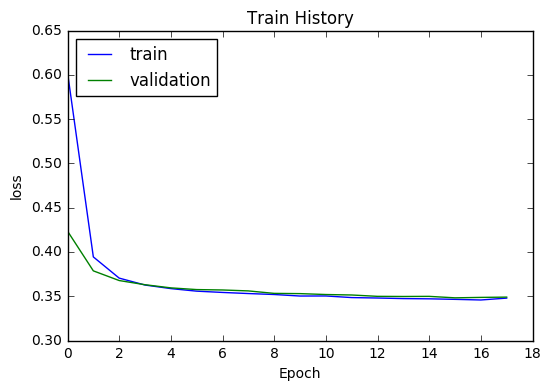

In [47]:
show_train_history(train_history,'loss','val_loss')

In [48]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 3s 112us/step


In [49]:
scores[1]

0.8520361234216908